# Auto reload modules

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import scripts.missing as missing
import missingno as msno
import pandas as pd
import numpy as np
import fs

In [18]:
MAIN_DIR = fs.open_fs("../../data/raw/project")
CSV_DIR = MAIN_DIR.getsyspath("car_dataframe.csv")

ITNERIM_DIR = fs.open_fs("../../data/interim/project")
CARS_CLEAN_CSV_DIR = ITNERIM_DIR.getsyspath("car_dataframe_clean.csv")

In [19]:
df = pd.read_csv(CSV_DIR)

In [20]:
df.columns

Index(['fuel_consumption_km_l', 'traccion', 'transmision', 'horsepower',
       'fuel_type', 'displacement', 'gears', 'engine_type', 'torque', 'turbo',
       'brand', 'age', 'body_type'],
      dtype='object')

In [21]:
df

,fuel_consumption_km_l,traccion,transmision,horsepower,fuel_type,displacement,gears,engine_type,torque,turbo,brand,age,body_type
0,7,4x2,Automático,449,estándar,3.0,7,Combustión,516,Sí,Mercedes Benz,9,Sedan
1,10,4x4,Automático,310,estándar,3.0,8,Combustión,325,Sí,Audi,7,Sedan
2,11,4x4,Automático,300,estándar,2.0,8,Combustión,295,Sí,Jaguar Xe,6,Sedan
3,17,4x2,Automático,150,estándar,1.4,7,Combustión,148,Sí,Seat,6,Suv
4,12,4x4,Automático,320,Gasolina,2.0,8,Combustión,295,Sí,Volvo,7,Suv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,14,4x2,Manual,100,Gasolina,1.6,5,Combustión,105,No,Volkswagen,9,Sedan
1873,14,4x2,Manual,105,estándar,1.6,5,Combustión,107,No,Renault,7,Sedan
1874,15,4x2,Manual,115,NoInfo,NaN,0,NoInfo,114,No,Chevrolet,8,Hatchback
1875,9,4x4,Automático,285,estándar,NaN,0,NoInfo,300,No,Lincoln,9,Suv


In [22]:
(
    df
    .select_dtypes(object)
    .apply(pd.unique)
)

traccion                                              [4x2, 4x4]
transmision                                 [Automático, Manual]
fuel_type      [estándar, Gasolina, Híbrido, Eléctrico, Diese...
engine_type    [Combustión, Eléctrico, Híbrido, Mild Hybrid, ...
turbo                                                   [Sí, No]
brand          [Mercedes Benz, Audi, Jaguar Xe, Seat, Volvo, ...
body_type      [Sedan, Suv, Convertible, Hatchback, Minivan, ...
dtype: object

In [23]:
df['fuel_type'].unique()

array(['estándar', 'Gasolina', 'Híbrido', 'Eléctrico', 'Diesel', 'NoInfo'],
      dtype=object)

In [24]:
df['engine_type'].unique()

array(['Combustión', 'Eléctrico', 'Híbrido', 'Mild Hybrid', 'NoInfo',
       'Motor Supercargado'], dtype=object)

In [34]:
df['body_type'].unique()

array(['Sedan', 'Suv', 'Convertible', 'Hatchback', 'Minivan', 'Coupe',
       'Wagon', 'Pickup', 'Van', 'Targa'], dtype=object)

In [25]:
df = (
    df
    .replace(
        to_replace=[0,'NoInfo'],
        value=np.nan
    )
    .replace(
        to_replace=['estándar'],
        value='Estándar'
    )
)

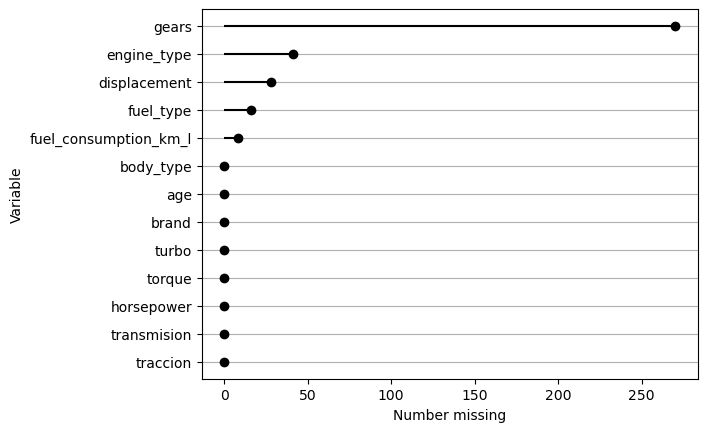

In [26]:
df.missing.missing_variable_plot()

c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


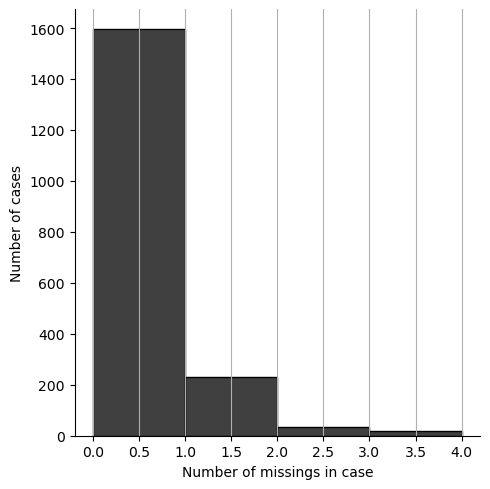

In [27]:
df.missing.missing_case_plot()

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

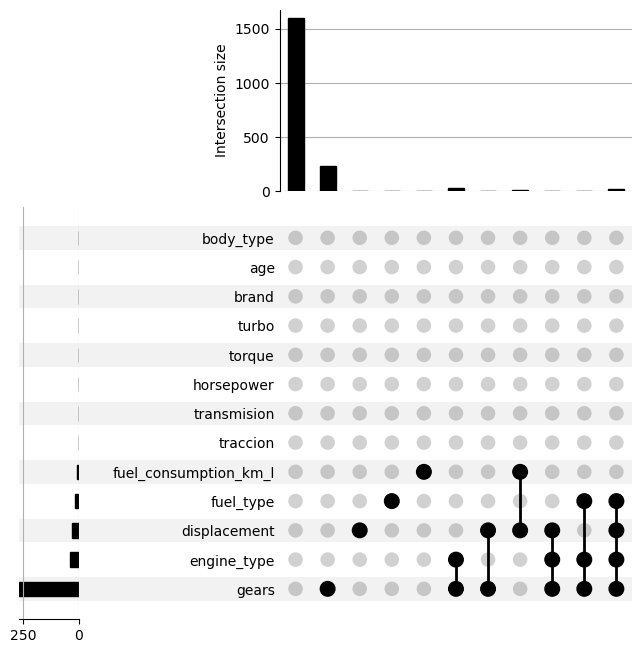

In [28]:
(
    df
    .missing
    .missing_upsetplot(
        variables = None, 
        element_size = 30
    )
)

In [29]:
df.shape

(1877, 13)

In [30]:
df = df.dropna().drop_duplicates()

In [31]:
df.shape

(1235, 13)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1235 entries, 0 to 1873
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fuel_consumption_km_l  1235 non-null   float64
 1   traccion               1235 non-null   object 
 2   transmision            1235 non-null   object 
 3   horsepower             1235 non-null   int64  
 4   fuel_type              1235 non-null   object 
 5   displacement           1235 non-null   float64
 6   gears                  1235 non-null   float64
 7   engine_type            1235 non-null   object 
 8   torque                 1235 non-null   int64  
 9   turbo                  1235 non-null   object 
 10  brand                  1235 non-null   object 
 11  age                    1235 non-null   int64  
 12  body_type              1235 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 135.1+ KB


In [33]:
df.to_csv(CARS_CLEAN_CSV_DIR, encoding='utf-8', index=False)